In [30]:

import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, ttest_ind
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv(r"D:\CSV FILES/marketing_AB.csv")

In [32]:

print("Dataset Loaded Successfully")
print(df.head())

Dataset Loaded Successfully
   Unnamed: 0  user id test group  converted  total ads most ads day  \
0           0  1069124         ad      False        130       Monday   
1           1  1119715         ad      False         93      Tuesday   
2           2  1144181         ad      False         21      Tuesday   
3           3  1435133         ad      False        355      Tuesday   
4           4  1015700         ad      False        276       Friday   

   most ads hour  
0             20  
1             22  
2             18  
3             10  
4             14  


In [33]:
control = df[df['test group'] == 'psa']
test = df[df['test group'] == 'ad']

In [34]:
control_conv = control['converted'].mean()
test_conv = test['converted'].mean()

In [35]:

print("\nConversion Rates")
print("Control:", round(control_conv,4))
print("Test:", round(test_conv,4))



Conversion Rates
Control: 0.0179
Test: 0.0255


In [36]:

"""H0: No difference in conversion rates
H1: Significant difference in conversion rates
Alpha = 0.05
"""

'H0: No difference in conversion rates\nH1: Significant difference in conversion rates\nAlpha = 0.05\n'

In [37]:
conversion_table = pd.crosstab(df['test group'], df['converted'])




In [38]:
chi2, p_value, dof, expected = chi2_contingency(conversion_table)

In [39]:

print("\nChi-Square Test Result")
print("Chi2:", round(chi2,3))
print("P-value:", round(p_value,5))


Chi-Square Test Result
Chi2: 54.006
P-value: 0.0


In [40]:
control_rev = control['total ads']
test_rev = test['total ads']

In [41]:

t_stat, p_rev = ttest_ind(test_rev, control_rev, equal_var=False)


In [42]:

print("\nT-Test on Revenue")
print("T-statistic:", round(t_stat,3))
print("P-value:", round(p_rev,5))



T-Test on Revenue
T-statistic: 0.218
P-value: 0.82743


In [43]:
mean_diff = test_rev.mean() - control_rev.mean()

In [44]:

std_error = np.sqrt(
    test_rev.var()/len(test_rev) +
    control_rev.var()/len(control_rev)
)

In [45]:

ci_low = mean_diff - 1.96 * std_error
ci_high = mean_diff + 1.96 * std_error


In [46]:

print("\n95% Confidence Interval for Revenue Difference")
print("Lower:", round(ci_low,2))
print("Upper:", round(ci_high,2))



95% Confidence Interval for Revenue Difference
Lower: -0.5
Upper: 0.62


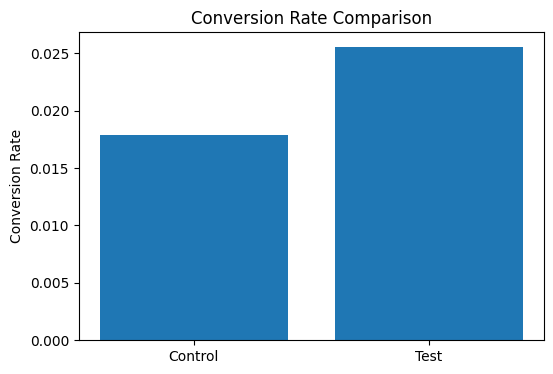

In [47]:
plt.figure(figsize=(6,4))
plt.bar(['Control','Test'], [control_conv, test_conv])
plt.title("Conversion Rate Comparison")
plt.ylabel("Conversion Rate")
plt.show()

In [48]:
if p_value < 0.05:
    decision = "Reject Null Hypothesis (Significant Difference)"
else:
    decision = "Fail to Reject Null Hypothesis (No Significant Difference)"

print("\nFinal Decision:", decision)



Final Decision: Reject Null Hypothesis (Significant Difference)


In [49]:
if p_value < 0.05 and test_conv > control_conv:
    recommendation = "Launch TEST campaign – better performance"
else:
    recommendation = "Do NOT launch test campaign"

print("Business Recommendation:", recommendation)


Business Recommendation: Launch TEST campaign – better performance


In [50]:
summary = pd.DataFrame({
    "Metric": [
        "Control Conversion Rate",
        "Test Conversion Rate",
        "Conversion P-Value",
        "Revenue P-Value"
    ],
    "Value": [
        control_conv,
        test_conv,
        p_value,
        p_rev
    ]
})


In [51]:
summary.to_csv("ab_test_summary.csv", index=False)

In [52]:
print("\nSummary file saved as ab_test_summary.csv")


Summary file saved as ab_test_summary.csv
